# Question 5: V-plot
You can imagine when a protein binds to DNA, then that region will be protected by nucleases (a type of enzyme that cleaves DNA). If you are to plot the protected fragments at protein binding sites, it will take a V-form. Your goal is to show this V-formation using the input data.

You have to plot a heatmap of this.

In [9]:
# Imports 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

In [10]:
freq = defaultdict(int)

with open("mapped.bed") as file:
    for line in file:
        parts = line.strip().split("\t")
        
        start_a, end_a = int(parts[2]), int(parts[3])
        start_b, end_b = int(parts[8]), int(parts[9])
        
        center_a = (start_a + end_a) // 2
        center_b = (start_b + end_b) // 2
        
        center_offset = center_b - center_a
        fragment_length = end_b - start_b
        
        freq[(center_offset, fragment_length)] += 1

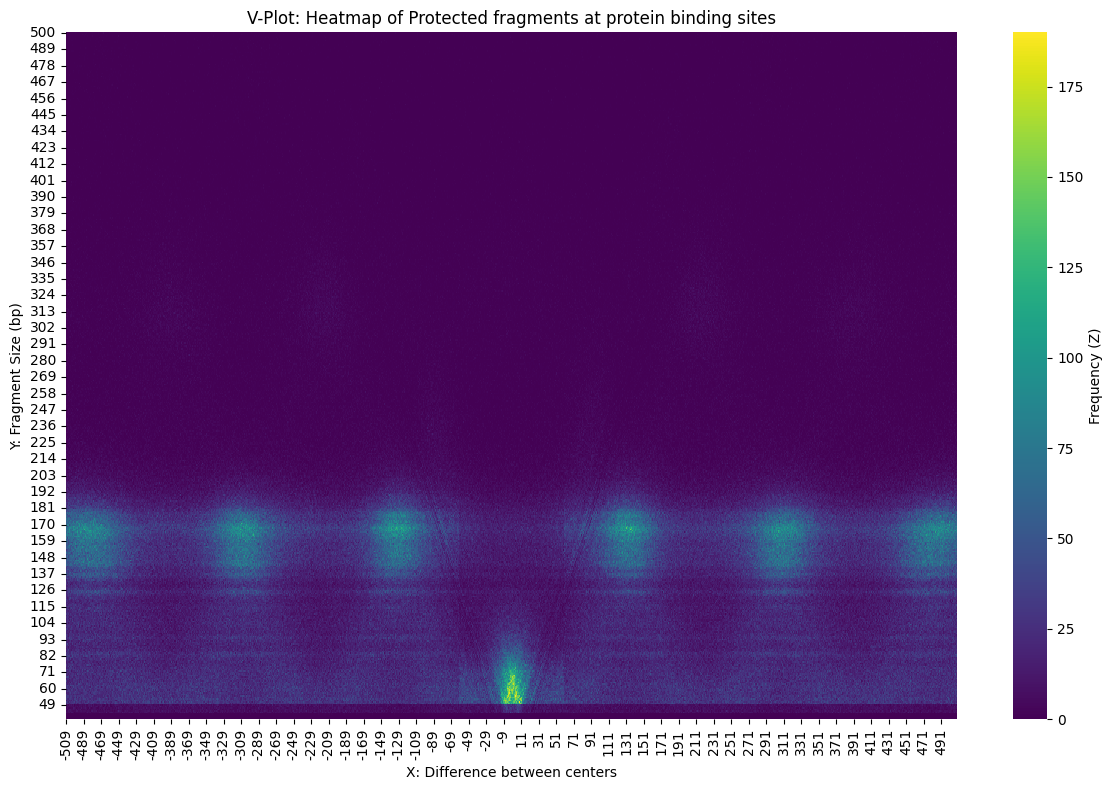

In [11]:
# Convert to DataFrame for plotting
data = pd.DataFrame(
    [(x, y, z) for (x, y), z in freq.items()],
    columns=["X", "Y", "Z"]
)

# Pivot table to create 2D grid for heatmap
heatmap_data = data.pivot_table(index="Y", columns="X", values="Z", fill_value=0)
heatmap_data = heatmap_data.sort_index(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Frequency (Z)'})
plt.title("V-Plot: Heatmap of Protected fragments at protein binding sites")
plt.xlabel("X: Difference between centers")
plt.ylabel("Y: Fragment Size (bp)")
plt.tight_layout()
plt.show()
